<a href="https://colab.research.google.com/github/xeromark/TareasIA/blob/main/TareaIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prerrequisitos

In [2]:
pip install bnlearn

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1

# Método Exhaustivesearch

Exhaustivesearch determina todas las posibles estructuras de red bayesiana en un conjunto de datos para seleccionar la estructura que se adecue mejor estos. Por lo tanto, este método garantiza encontrar la estructura más óptima a costa de usar muchos recursos computacionales de la máquina en donde se utiliza.


[bnlearn] >Computing best DAG using [ex]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Compute edge strength with [chi_square]
+----+-----------+-----------+-------------+-------------+--------------+-------+
|    | source    | target    | stat_test   |     p_value |   chi_square |   dof |
+====+===========+===========+=============+=============+==============+=======+
|  0 | Cloudy    | Rain      | True        | 1.08061e-87 |      394.062 |     1 |
+----+-----------+-----------+-------------+-------------+--------------+-------+
|  1 | Cloudy    | Sprinkler | True        | 8.38371e-53 |      233.906 |     1 |
+----+-----------+-----------+-------------+-------------+--------------+-------+
|  2 | Rain      | Wet_Grass | True        | 3.88651e-64 |      285.902 |     1 |
+----+-----------+-----------+-------------+-------------+--------------+-------+
|  3 | Sprinkler | Wet_Grass | True        | 1.19692e-23

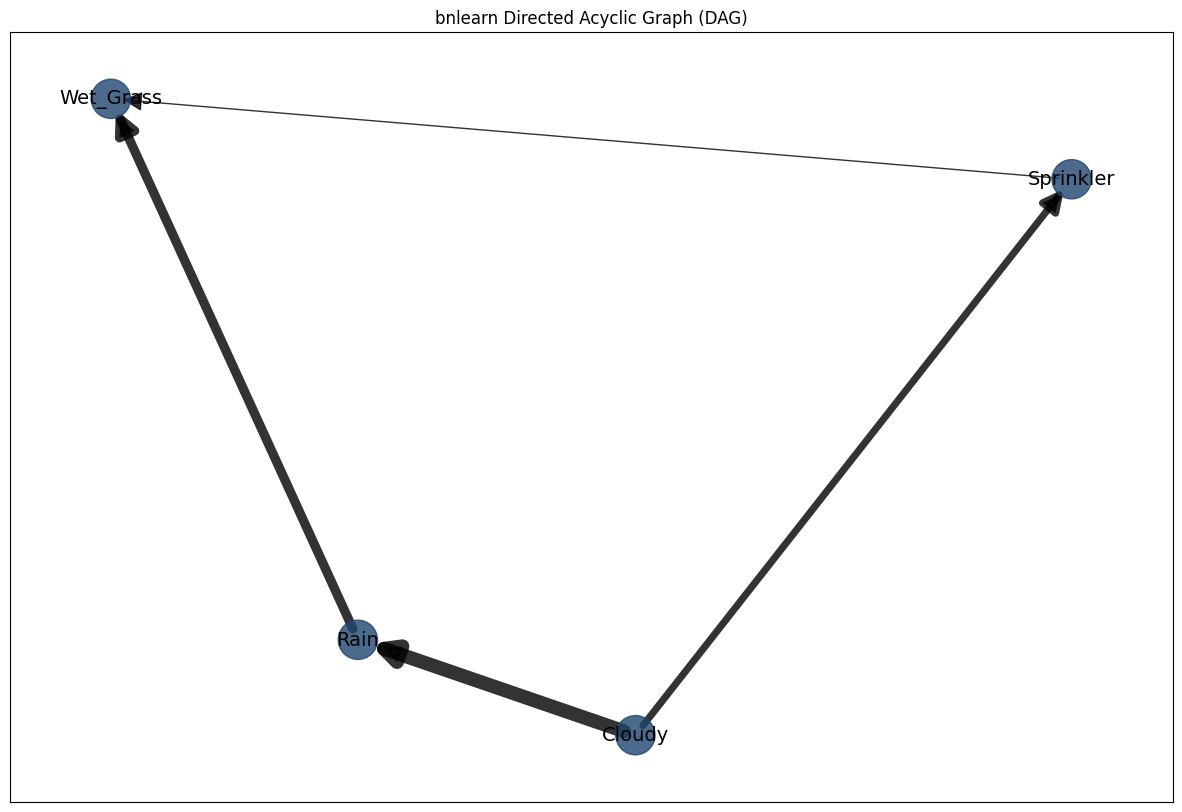

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'Rain': array([-0.35259793, -0.55136626]),
  'Wet_Grass': array([-0.82075296,  0.76532462]),
  'Sprinkler': array([1.       , 0.5695545]),
  'Cloudy': array([ 0.1733509 , -0.78351286])},
 'G': <networkx.classes.digraph.DiGraph at 0x7ce269d9bcd0>,
 'node_properties': {'Cloudy': {'node_color': '#1f456e', 'node_size': 800},
  'Rain': {'node_color': '#1f456e', 'node_size': 800},
  'Sprinkler': {'node_color': '#1f456e', 'node_size': 800},
  'Wet_Grass': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_properties': {('Rain', 'Wet_Grass'): {'color': '#000000',
   'weight': 6.689748948659384},
  ('Sprinkler', 'Wet_Grass'): {'color': '#000000', 'weight': 1.0},
  ('Cloudy', 'Rain'): {'color': '#000000', 'weight': 10.0},
  ('Cloudy', 'Sprinkler'): {'color': '#000000', 'weight': 5.097027493343889}}}

In [4]:
import bnlearn as bn
from tabulate import tabulate
import pandas as pd

df = pd.read_csv('dataset.csv')

model = bn.structure_learning.fit(df, methodtype='ex', scoretype='bic')

model = bn.independence_test(model, df, alpha=0.05, prune=True)

print(tabulate(model['independence_test'], tablefmt="grid", headers="keys"))
bn.plot(model)